In [61]:
import pandas as pd

In [62]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [63]:
data = data.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [65]:
data.isnull()

,DT,ST
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [66]:
data.mean()

DT    16.790952
ST     6.190476
dtype: float64

In [67]:
data.median()

DT    17.83
ST     6.00
dtype: float64

In [68]:
data.mode()

,DT,ST
0,8.00,7.0
1,9.50,NaN
2,10.75,NaN
3,11.50,NaN
4,12.03,NaN
5,13.50,NaN
6,13.75,NaN
7,14.88,NaN
8,15.35,NaN
9,16.68,NaN


In [69]:
data.var()

DT    25.754619
ST     6.461905
dtype: float64

In [70]:
data.std()

DT    5.074901
ST    2.542028
dtype: float64

In [71]:
from scipy import stats
data.skew()

DT    0.352390
ST    0.047115
dtype: float64

In [72]:
data.kurtosis()

DT    0.317960
ST   -1.148455
dtype: float64

In [73]:
df=data.corr()

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

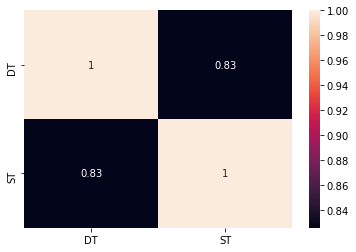

In [75]:
sns.heatmap(df, annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Delivery Time BOX PLOT')

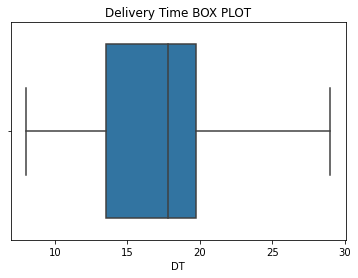

In [76]:
sns.boxplot(data['DT']).set_title('Delivery Time BOX PLOT')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sorting Time BOX PLOT')

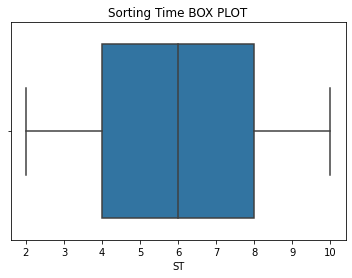

In [77]:
sns.boxplot(data['ST']).set_title('Sorting Time BOX PLOT')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

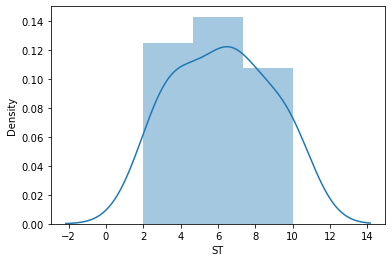

In [78]:
import seaborn as sns
sns.distplot(data['ST'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

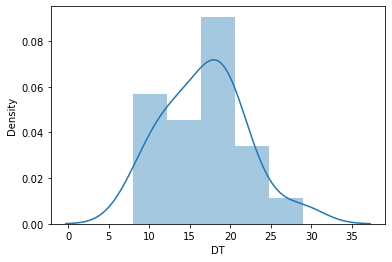

In [79]:
import seaborn as sns
sns.distplot(data['DT'])

Fitting a Linear Regression Model

In [80]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data).fit()

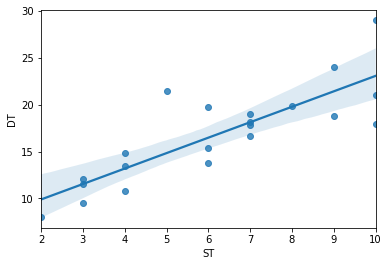

In [81]:
sns.regplot(x="ST", y="DT", data=data);

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                        13:12:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predict for new data point

In [83]:
import numpy as np
data["log_ST"]=np.log(data.ST)

model_logST=smf.ols("DT~log_ST",data=data).fit()
model_logST.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           2.64e-06
Time:                        13:12:10   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
log_ST         9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

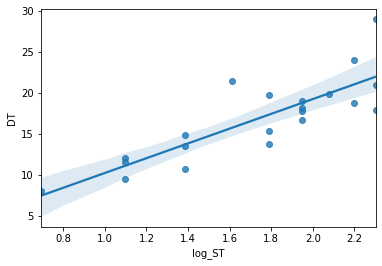

In [84]:
sns.regplot(x="log_ST", y="DT",data=data);

In [85]:
import numpy as np
data["log_DT"]=np.log(data.DT)

model_exp=smf.ols("log_DT~log_ST",data=data).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.60e-07
Time:                        13:12:11   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
log_ST         0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

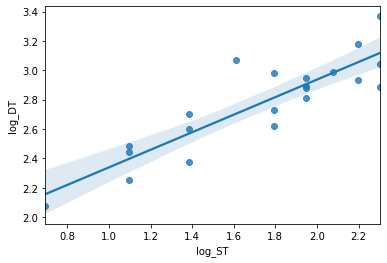

In [86]:
sns.regplot(x="log_ST", y="log_DT",data=data);

In [87]:
model_exp1=smf.ols("log_DT~ST",data=data).fit()
model_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_DT   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.59e-06
Time:                        13:12:11   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

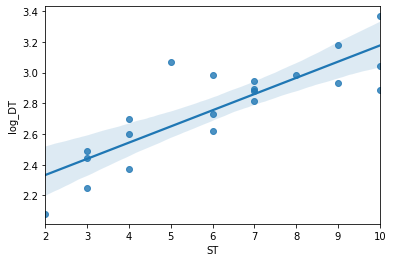

In [88]:
sns.regplot(x="ST", y="log_DT",data=data);

In [89]:
data["ST_sq"]=data.ST*data.ST

model_quad=smf.ols("log_DT~ST+ST_sq",data=data).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_DT   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           2.20e-06
Time:                        13:12:12   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_sq         -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

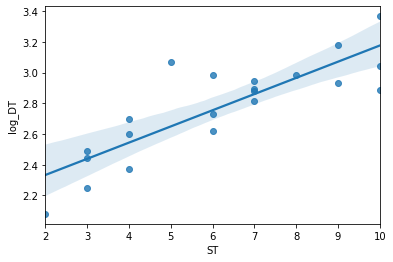

In [90]:
sns.regplot(x="ST", y="log_DT",data=data);

In [91]:
dict={"model":["basic","log_ST","log_DT&ST","log_DT","ST_sq"], "R_sqrd":[model.rsquared,model_logST.rsquared,model_exp.rsquared,model_exp1.rsquared,model_quad.rsquared]}
R_sqrd_table=pd.DataFrame(dict)
R_sqrd_table

,model,R_sqrd
0,basic,0.682271
1,log_ST,0.695443
2,log_DT&ST,0.772161
3,log_DT,0.710948
4,ST_sq,0.764867


In [92]:
newdata=pd.Series([200,300])

In [93]:
data_pred=pd.DataFrame(newdata,columns=['ST'])
data_pred["log_ST"]=np.log(data_pred.ST)
np.exp(model_exp.predict(data_pred))

0    135.348106
1    172.452955
dtype: float64